Cargando la base de datos de 50000 reseñas cortas de películas (limitando a 10000 palabras). Carga 25000 para entrenamiento y 25000 para pruebas

In [2]:
import numpy as np
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
print('Tamaño del conjunto de entrenamiento',train_data.size)
print('Tamaño del conjunto de prueba',test_data.size)

Tamaño del conjunto de entrenamiento 25000
Tamaño del conjunto de prueba 25000


Codificando la secuencia de números de cada reseña en una matriz ReseñaxPalabra. Esto produce una matriz dispersa de 0's y 1's

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Transformar el tipo de las matrices de etiquetas

In [5]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Definición del modelo

In [6]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

inputs = keras.Input(shape=(10000))
x = layers.Flatten()(inputs)
outputs = layers.Dense(1, activation="sigmoid",use_bias=False)(x) 
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10000)]           0         
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 1)                 10000     
                                                                 
Total params: 10,000
Trainable params: 10,000
Non-trainable params: 0
_________________________________________________________________


Parametrizar el modelo

In [65]:
model.compile(optimizer= 'rmsprop', loss='binary_crossentropy', metrics=["accuracy"])  


Definir el conjunto de validación y quedan 10000 para validacion y 15000 para entrenamiento

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Entrenar el modelo

In [66]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=1,
                    batch_size=1,
                    validation_data=(x_val, y_val)) 

15000/15000 [==============================] - 51s 3ms/step - loss: 0.0703 - accuracy: 0.9770 - val_loss: 0.4227 - val_accuracy: 0.8876


Matriz de confusión


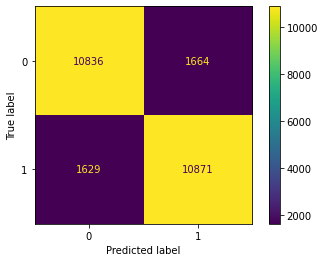

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_predictions = model.predict(x_test)
cm = confusion_matrix(test_labels, test_predictions > 0.5)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Cálculo de la exactitud (en inglés, accurracy)

In [73]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, test_predictions > 0.5))

0.86828


**Ejercicio:**

Desarrollar un modelo que tenga la mejor exactitud (en inglés, accurracy) posible en el conjunto de prueba (en inglés, test). Para lograrlo, hay que hacer un entrenamiento sin sobreajustar (en inglés, overfit)